### DC-parameters  

Here are some codes for computing EM and DC parameters 


In [63]:
# Import required modules 

import numpy as np 
import matplotlib.pyplot as plt

#---------import watex modules ---------------------------------------------------------------
from watex.datasets import load_edis, load_gbalo, load_semien, load_tankesse , load_hlogs
from watex.utils import erpSelector 
from watex.methods import DCProfiling, DCSounding, ResistivityProfiling, VerticalSounding,Processing , Logging, MXS 
 
# ----------------end of import --------------------------------------------------------------

In [4]:
# 
# Module EM 
# ==========

# The EM module is related for a few meter exploration in the case of groundwater 
# exploration. Module provides some basics processing steps for EMAP data filtering
# and remove noises. Commonly the methods mostly used in the groundwater 
# exploration is the audio-magnetoteluric because of the shortest frequency 
# and rapid executions. Furthermore, we can also list some other advantages 
# such as: 
    
#     * is useful for imaging both deep geologic structure and near-surface 
#         geology and can provide significant details. 
#     *  includes a backpack portable system that allows for use in difficult 
#         terrain. 
#     * the technique requires no high-voltage electrodes, and logistics 
#         are relatively easy to support in the field. Stations can be acquired 
#         almost anywhere and can be placed any distance apart. This allows for
#         large-scale regional reconnaissance exploration or detailed surveys of 
#         local geology and has no environmental impact 

# :notes: For deep implementation or explorating a large scale of EM/AMT data  
#     processing, it is recommended to use the package `pycsamt`_. 
    
#-------------------------------END NOTES -----------------------------------------------

#     Create EM object as a collection of EDI-file. 
    
#     Collect edifiles and create an EM object. It sets  the properties from 
#     audio-magnetotelluric. The two(2) components XY and YX will be set and 
#     calculated.Can read MT data instead, however the full handling transfer 
#     function like Tipper and Spectra  is not completed. Use  other MT 
#     softwares for a long periods data.

In [9]:
from watex.methods.em import EM
edi_data = load_edis (return_data =True, samples =7) # object from Edi_collection 
emObjs = EM().fit(edi_data)
ref=emObjs.getfullfrequency ()  
ref

            

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
|Data collected =  7      |EDI success. read=  7      |Rate     =  100.0  %|
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


array([58800.  , 52128.64, 46214.21, 40970.82, 36322.34, 32201.26,
       28547.76, 25308.77, 22437.28, 19891.58, 17634.71, 15633.91,
       13860.11, 12287.56, 10893.43,  9657.48,  8561.76,  7590.36,
        6729.17,  5965.69,  5288.83,  4688.77,  4156.79,  3685.16,
        3267.05,  2896.38,  2567.76,  2276.42,  2018.14,  1789.17,
        1586.17,  1406.21,  1246.66,  1105.22,   979.82,   868.65,
         770.1 ,   682.72,   605.26,   536.59,   475.71,   421.74,
         373.89,   331.47,   293.86,   260.52,   230.96,   204.76,
         181.52,   160.93,   142.67,   126.48,   112.13,    99.41])

In [10]:
emObjs.freqs_ # # however full frequency can just be fetched using the attribute `freqs_` 

array([58800.  , 52128.64, 46214.21, 40970.82, 36322.34, 32201.26,
       28547.76, 25308.77, 22437.28, 19891.58, 17634.71, 15633.91,
       13860.11, 12287.56, 10893.43,  9657.48,  8561.76,  7590.36,
        6729.17,  5965.69,  5288.83,  4688.77,  4156.79,  3685.16,
        3267.05,  2896.38,  2567.76,  2276.42,  2018.14,  1789.17,
        1586.17,  1406.21,  1246.66,  1105.22,   979.82,   868.65,
         770.1 ,   682.72,   605.26,   536.59,   475.71,   421.74,
         373.89,   331.47,   293.86,   260.52,   230.96,   204.76,
         181.52,   160.93,   142.67,   126.48,   112.13,    99.41])

In [12]:
# get the reference frequency 
rfreq = emObjs.getreferencefrequency () 
rfreq

58800.0

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
|Data collected =  7      |EDI success. read=  7      |Rate     =  100.0  %|
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


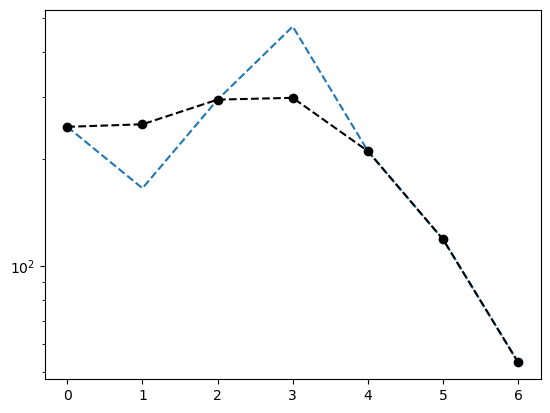

In [14]:
# # Fast process EMAP and AMT data. Tools are used for data sanitizing, 
#     removing noises and filtering. 

p = Processing().fit(edi_data) 
p.window_size =2 
p.component ='yx'
rc= p.tma()
# get the resistivy value of the third frequency  at all stations 
# >>> p.res2d_[3, :]  

# get the resistivity value corrected at the third frequency 
# >>> rc [3, :]

plt.semilogy (np.arange (p.res2d_.shape[1] ), p.res2d_[3, :], '--',
                  np.arange (p.res2d_.shape[1] ), rc[3, :], 'ok--')
 

In [23]:
# Compute the skew : The conventional asymmetry parameter based on the Z magnitude. 
# p = Processing().fit(edi_data) 
# sk,_ = p.skew()
# sk[0:, ]

In [27]:
# restore tensor 
pObjs= Processing().fit(edi_data)
# One can specify the frequency buffer like the example below, However 
# it is not necessaray at least there is a a specific reason to fix the frequencies 
buffer = [1.45000e+04,1.11500e+01]
zobjs_b =  pObjs.zrestore(
    # buffer = buffer
) 
zobjs_b 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
|Data collected =  7      |EDI success. read=  7      |Rate     =  100.0  %|
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


array([<watex.externals.z.Z object at 0x000001F32B7021F0>,
       <watex.externals.z.Z object at 0x000001F32AB636A0>], dtype=object)

In [33]:
# control the quality of the EM data 

#     pobj = Processing().fit(edi_data)
#     f = pobj.getfullfrequency ()
#     # len(f)
#     # ... 55 # 55 frequencies 
#     c, = pobj.qc ( tol = .6 ) # mean 60% to consider the data as
#     # representatives 
#     c  # the representative rate in the whole EDI- collection
#      # ... 0.95 # the whole data at all stations is safe to 95%. 
#     # now check the interpolated frequency 
#     c, freq_new,  = pobj.qc ( tol=.6 , return_freq =True)
#     # len(freq_new)
#     # ... 53  # delete two frequencies 

In [34]:
##### DC-ELECTRICAL METHODS 
# -------------------------------------------------------------

# A collection of DC-resistivity profiling and sounding classes. 
    
#     It reads and compute electrical parameters. Each line or site compose a specific
#     object and gather all the attributes of :class:`~.ResistivityProfiling` 
#             or :class:`~.VerticalSounding`  for
#     easy use. For instance, the expeced drilling location point  and its 
#     resistivity value for two survey lines ( line1 and line2) can be fetched 

In [47]:
# DC -Profiling 

#     (1) -> Get DC -resistivity profiling from the individual Resistivity object 

robj1= ResistivityProfiling(auto=True) # auto detection 
robj1.utm_zone = '50N'
data = erpSelector ('data/erp/testsafedata.xlsx', force =True)
robj1.fit(data) 
robj1.sves_ # S036
robj2= ResistivityProfiling(auto=True, utm_zone='40S') 
robj2.fit(erpSelector('data/erp/l11_gbalo.xlsx', force =True)) 
robj2.sves_ # 'S006'
# read the both objects 
dcobjs = DCProfiling() 
dcobjs.fit(robj1, robj2) 
dcobjs.sves_ 
# ... array(['S036', 'S006'], dtype=object)
dcobjs.line1.sves_ # => robj1.sves_
dcobjs.line2.sves_ # => robj2.sves_ 
    
     # (2) -> Read from a collection of excell data 
        

D:\projects\watex\watex\utils\coreutils.py:544: UserWarning: Force considering unsafety data as ERP data might lead to breaking code or invalid results during ERP parameters computation. Use at your own risk.
  warnings.warn("Force considering unsafety data as ERP data might"
D:\projects\watex\watex\utils\coreutils.py:544: UserWarning: Force considering unsafety data as ERP data might lead to breaking code or invalid results during ERP parameters computation. Use at your own risk.
  warnings.warn("Force considering unsafety data as ERP data might"
dc-erp: 100%|###########################################| 2/2 [00:00<?, ?B/s]


'S006'

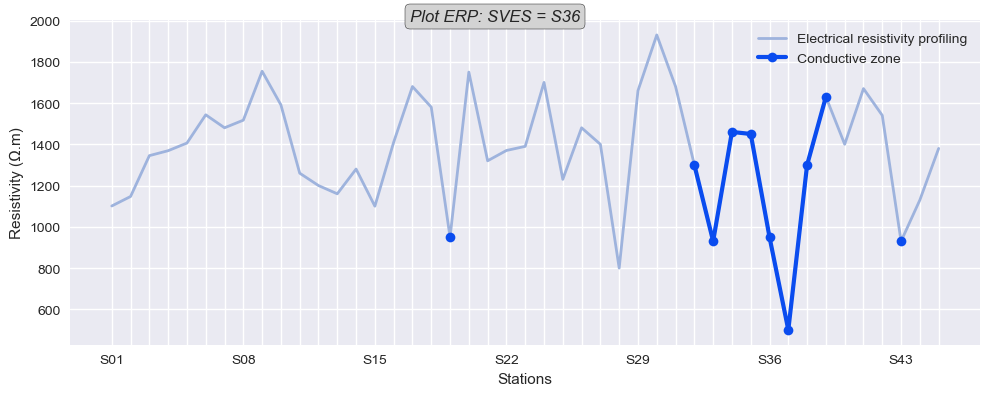

In [48]:
# (2) -> Plot conductive zone for line 1 

robj1.plotAnomaly () 

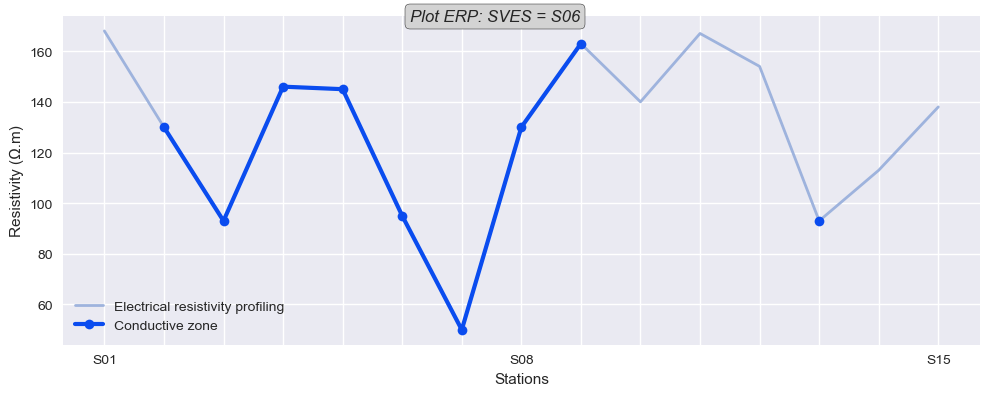

In [49]:
robj2.plotAnomaly () # plot conductive zones for second lines 


In [50]:
# Get parameters 
robj1.summary(return_table=True ) 

,dipole,longitude,latitude,easting,northing,sves_resistivity,power,magnitude,shape,type,sfi
station,,,,,,,,,,,
S036,10,119,9,790232,1093057.0,500,60,1130,V,PC,0.076391


In [51]:
robj2.summary (keep_params=True, return_table= True) # keep only the main prediction params 

,power,magnitude,shape,type,sfi
0,60,113,V,PC,0.076391


In [52]:
# DC SOUNDING 

dsobj = DCSounding ()  
dsobj.search = 30. # start detecting the fracture zone from 30m depth.
dsobj.fit('data/ves/ves_gbalo.xlsx')
dsobj.ohmic_areas_
#...  array([523.25458506])
dsobj.site1.fractured_zone_ #

dc-ves: 100%|###################################| 1/1 [00:00<00:00, 34.58B/s]


array([ 28.,  32.,  36.,  40.,  45.,  50.,  55.,  60.,  70.,  80.,  90.,
       100.])

In [54]:
# (2) -> read multiple sounding files 
    
dsobj.search = [ 30, 30, 30, 30] # search values for all sites 
dsobj.fit('data/ves')
dsobj.ohmic_areas_  
#... array([ 523.25458506,  523.25458506, 1207.41759558]) 
dsobj.nareas_ 
# ... array([2., 2., 3.]) 
dsobj.survey_names_
# ... ['ves_gbalo', 'ves_gbalo', 'ves_gbalo_unique']
dsobj.nsites_ 
#... 3 
dsobj.site1.ohmic_area_

dc-ves: 100%|###################################| 4/4 [00:00<00:00, 69.78B/s]


569.0351170807086

In [55]:
dsobj.data_ 

[VerticalSounding(AB= 200.0, MN= 20.0, arrangememt= schlumberger, ... , rho0= ((None,),), h0= 1.0, strategy= HMCMC),
 VerticalSounding(AB= 200.0, MN= 20.0, arrangememt= schlumberger, ... , rho0= ((None,),), h0= 1.0, strategy= HMCMC),
 VerticalSounding(AB= 200.0, MN= 20.0, arrangememt= schlumberger, ... , rho0= ((None,),), h0= 1.0, strategy= HMCMC)]

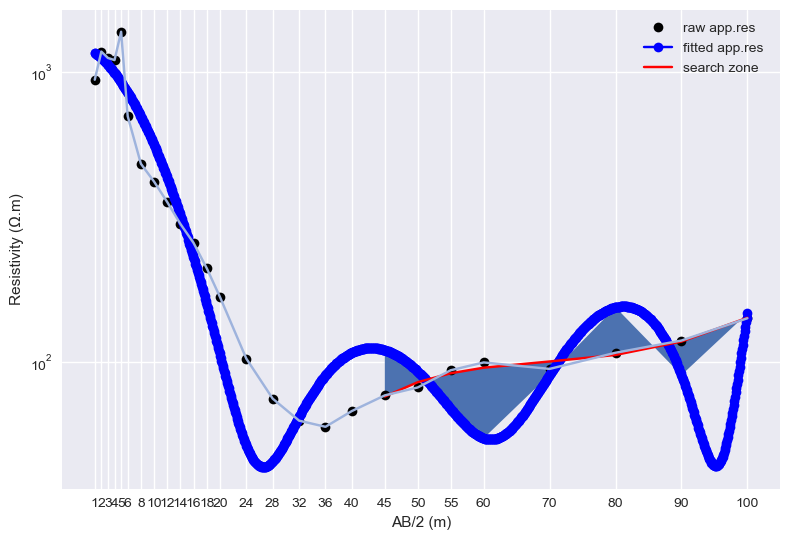

In [60]:
ves = VerticalSounding ().fit (dsobj.site3.data_) 
ves.plotOhmicArea (fbtw=True )

In [61]:
# # Hydrogeological module 
# ========================
# Hydrogeological parameters of aquifer are the essential and crucial basic data 
# in the designing and construction progress of geotechnical engineering and 
# groundwater dewatering, which are directly related to the reliability of these 
# parameters.

# Created on Mon Sep 19 09:04:21 2022


In [64]:

# get the logging data 
h = load_hlogs ()
h.feature_names



['hole_id',
 'depth_top',
 'depth_bottom',
 'strata_name',
 'rock_name',
 'layer_thickness',
 'resistivity',
 'gamma_gamma',
 'natural_gamma',
 'sp',
 'short_distance_gamma',
 'well_diameter']

In [65]:
# we can fit to collect the valid logging data
log= Logging(kname ='k', zname='depth_top' ).fit(h.frame[h.feature_names])
log.feature_names_in_ # categorical features should be discarded.


['depth_top',
 'depth_bottom',
 'layer_thickness',
 'resistivity',
 'gamma_gamma',
 'natural_gamma',
 'sp',
 'short_distance_gamma',
 'well_diameter']

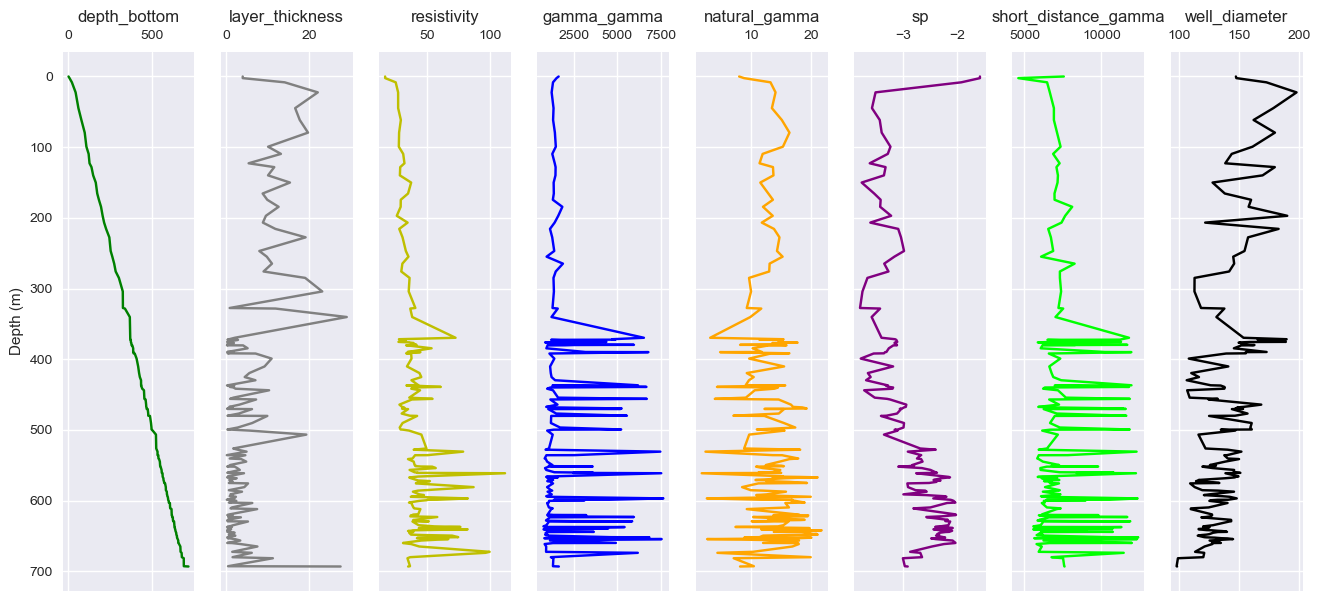

Logging(zname= depth_top, kname= k, verbose= 0)

In [66]:
log.plot ()


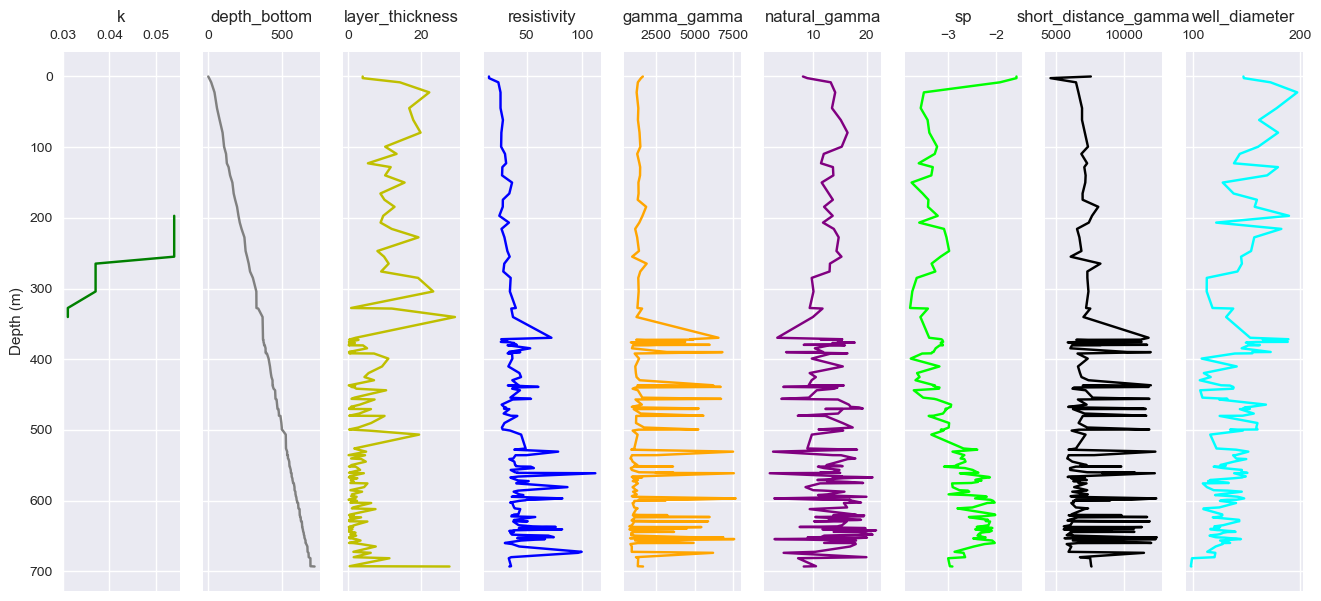

Logging(zname= depth_top, kname= k, verbose= 0)

In [67]:
# plot log including the target y 
log.plot (y = h.frame.k , posiy =0 )# first position 


In [68]:
# Mixture Learning Strategy (MXS)    

# The use of machine learning for k-parameter prediction seems an alternative
# way to reduce the cost of data collection thereby saving money. However, 
# the borehole data comes with a lot of missing k  since the parameter is 
# strongly tied to the aquifer after the pumping test. In other words, the 
# k-parameter collection is feasible if the layer in the well is an aquifer. 
# Unfortunately, predicting some samples of k in a large set of missing data 
# remains an issue using the classical supervised learning methods. We, 
# therefore propose an alternative approach called a mixture learning 
# strategy (MXS) to solve these double issues. It entails predicting upstream 
# a naïve group of aquifers (NGA) combined with the real values k to 
# counterbalance the missing values and yield an optimal prediction score. 
# The method, first, implies the K-Means and Hierarchical Agglomerative 
# Clustering (HAC) algorithms. K-Means and HAC are used for NGA label 
# predicting necessary the MXS label merging. 


In [70]:
hdata = load_hlogs ().frame 
# drop the 'remark' columns since there is no valid data 
hdata.drop (columns ='remark', inplace =True)
mxs = MXS (kname ='k').fit(hdata)
# predict the default NGA 
mxs.predictNGA() # default prediction with n_groups =3 
# make MXS labels using the default 'k' categorization 
ymxs=mxs.makeyMXS(categorize_k=True, default_func=True)
mxs.yNGA_ [62:74] 
# array([1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 1, 2])
ymxs[62:74] 
# array([ 1, 22, 22, 22,  3,  1, 22,  1, 22, 22,  1, 22]) 
# to get the label similariry , need to provide the 
# the column name of aquifer group and fit again like 
mxs = MXS (kname ='k', aqname ='aquifer_group').fit(hdata)
sim = mxs.labelSimilarity() 
sim 
# [(0, 'II')] # group II and label 0 are very similar

[(0, 'II')]